In [11]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [12]:
#Import fashion MNIST dataset
ashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

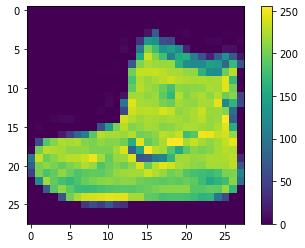

In [14]:
#Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

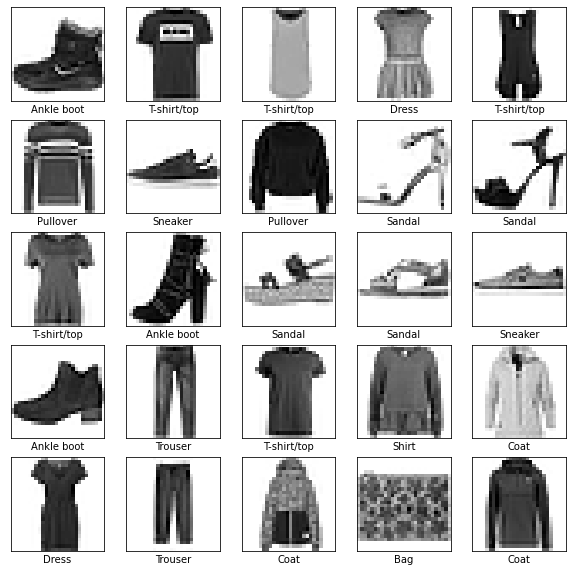

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
#Setup the layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 678us/step - loss: 0.4893 - accuracy: 0.8295
Epoch 2/10
1875/1875 [==============================] - 1s 662us/step - loss: 0.3732 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.3343 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.3122 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.2938 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.2781 - accuracy: 0.8980
Epoch 7/10
1875/1875 [==============================] - 1s 698us/step - loss: 0.2699 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 1s 727us/step - loss: 0.2573 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.2482 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 1s 743u

In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc) 

313/313 - 0s - loss: 0.3328 - accuracy: 0.8845

Test accuracy: 0.8845000267028809


In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [23]:
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([2.3418647e-09, 7.0207784e-10, 5.5289128e-08, 1.4457988e-11,
       5.6851257e-09, 3.1068714e-04, 1.2962672e-08, 2.2608298e-03,
       3.3299516e-10, 9.9742836e-01], dtype=float32)

In [26]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [27]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

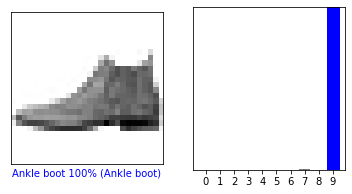

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

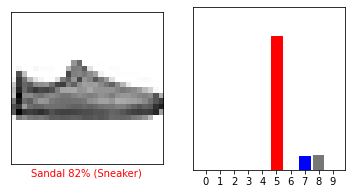

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

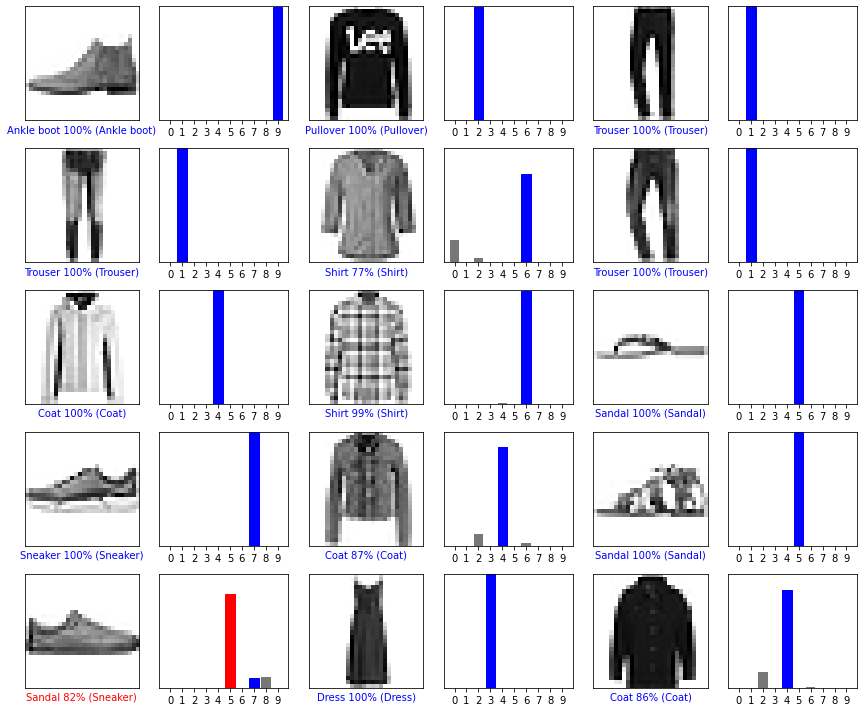

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [31]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [32]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.4915939e-05 4.4416137e-12 9.9650025e-01 1.6649945e-09 2.3183147e-03
  4.7066538e-14 1.1664246e-03 3.9332176e-21 6.3885169e-10 1.1129000e-12]]


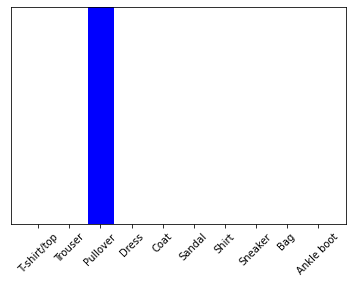

In [34]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [36]:
class_names[np.argmax(predictions_single[0])]

'Pullover'